In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from tqdm import trange
import pymc3 as pm
import theano
import theano.tensor as tt
from astropy import units as u
from astropy.cosmology import WMAP5, WMAP7
from astropy.coordinates import Distance
import os


%matplotlib inline

## Data

In [11]:
uvsm_z4=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z3.5-z4.5.dat", skiprows=3,sep="\s", engine='python')
uvsm_z5=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z4.5-z5.5.dat", skiprows=3,sep="\s", engine='python')
uvsm_z6=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z5.5-z6.5.dat", skiprows=3,sep="\s", engine='python')
uvsm_z7=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z6.5-z7.5.dat", skiprows=3,sep="\s", engine='python')
uvsm_z8=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z7.5-z8.5.dat", skiprows=3,sep="\s", engine='python')

smhm_z4=pd.read_csv("umachine-dr1/data/smhm/median_raw/smhm_a0.202435.dat", skiprows=0,sep="\s", engine='python')
smhm_z5=pd.read_csv("umachine-dr1/data/smhm/median_raw/smhm_a0.166998.dat", skiprows=0,sep="\s", engine='python')
smhm_z6=pd.read_csv("umachine-dr1/data/smhm/median_raw/smhm_a0.141685.dat", skiprows=0,sep="\s", engine='python')
smhm_z7=pd.read_csv("umachine-dr1/data/smhm/median_raw/smhm_a0.126498.dat", skiprows=0,sep="\s", engine='python')
smhm_z8=pd.read_csv("umachine-dr1/data/smhm/median_raw/smhm_a0.109623.dat", skiprows=0,sep="\s", engine='python')


In [13]:
smhm_z6

,#HM(0),Med_All(1),Err+(2),Err-(3),Med_Cen(4),Err+(5),Err-(6),Med_Cen_SF(7),Err+(8),Err-(9),...,Err-(33),True_Sat(34),Err+(35),Err-(36),True_SF(37),Err+(38),Err-(39),True_Q(40),Err+(41),Err-(42)
0,9.1,-4.474005,0.248714,0.018330,-4.474455,0.247552,0.017892,-4.474455,0.247552,0.017667,...,0.000000,-4.387822,0.286686,0.090353,-4.465759,0.221108,0.023385,0.0,0.0,0.000000
1,9.3,-4.313307,0.289633,0.138851,-4.315947,0.289530,0.137826,-4.315951,0.289534,0.134990,...,0.000000,-4.090126,0.243369,0.142832,-4.285788,0.255097,0.130011,0.0,0.0,0.000000
2,9.5,-3.992261,0.258147,0.159118,-3.998795,0.258283,0.159831,-3.998795,0.258283,0.158240,...,0.000000,-3.721740,0.227969,0.131186,-3.962802,0.221686,0.131315,0.0,0.0,0.000000
3,9.7,-3.579750,0.234923,0.136683,-3.587771,0.236504,0.136889,-3.587771,0.236504,0.136803,...,0.000000,-3.366746,0.219542,0.119916,-3.552707,0.211255,0.113835,0.0,0.0,0.000000
4,9.9,-3.280201,0.211332,0.109409,-3.289310,0.212368,0.110404,-3.289310,0.212367,0.110404,...,0.000000,-3.116453,0.195275,0.107095,-3.252918,0.187503,0.101804,0.0,0.0,0.000000
5,10.1,-3.103556,0.179377,0.098494,-3.120207,0.178329,0.098375,-3.120207,0.178329,0.097694,...,0.000000,-2.912287,0.165547,0.106776,-3.075471,0.172557,0.097693,0.0,0.0,0.000000
6,10.3,-2.970156,0.152390,0.087382,-2.987219,0.151541,0.089321,-2.987219,0.151541,0.082499,...,0.000000,-2.816277,0.127578,0.100288,-2.943657,0.146052,0.089159,0.0,0.0,0.000000
7,10.5,-2.845009,0.131479,0.077338,-2.857512,0.133249,0.078339,-2.857512,0.133249,0.078220,...,0.000000,-2.713639,0.109334,0.094475,-2.817725,0.116098,0.087151,0.0,0.0,0.000000
8,10.7,-2.715722,0.105995,0.071381,-2.722859,0.105972,0.072720,-2.722859,0.105972,0.069874,...,0.000000,-2.605032,0.088553,0.080259,-2.687374,0.096529,0.069130,0.0,0.0,0.000000
9,10.9,-2.582776,0.087206,0.066304,-2.589989,0.088462,0.066528,-2.589989,0.088462,0.061207,...,0.000000,-2.487270,0.068352,0.071980,-2.558522,0.075522,0.068560,0.0,0.0,0.000000


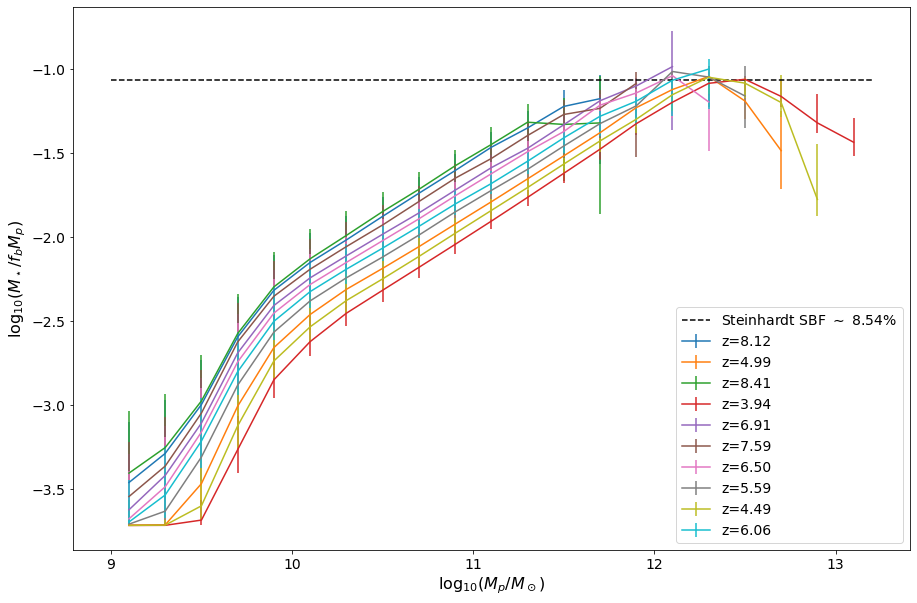

In [82]:
directory = 'umachine-dr1/data/smhm/median_raw/'
f_b = WMAP7.Ob(0) / WMAP7.Om(0)
count = 0
plt.figure(figsize=(15,10))
smhm_list = []
for f in os.scandir(directory):
    name = f.name
    if name.find('smhm_a')==0:
        smhm = pd.read_csv(directory+name, skiprows=0,sep="\s", engine='python')
        count+=1
        i = name.find('a0.') if name.find('a0.')>=0 else name.find('a1.')
        j = name.find('.dat')
        if i >=0 and j>=0:
            a =float(name[i+1:j])
            z = 1/a-1
            smhm.insert(0,'z',z)
            
            if count >1:
                smhm_merge = pd.concat([smhm_merge,smhm])
            else:
                smhm_merge = smhm
            
            if z>=3.5 and z<=8.5:
                smhm = smhm[smhm['Med_All(1)'].values<0]
                smhm.insert(2,'SBF',smhm['Med_All(1)'] -np.log10(f_b))
                plt.errorbar(smhm['#HM(0)'],smhm['SBF'],yerr=[smhm['Err-(3)'],smhm['Err+(2)']], label='z=%.2f'%z)
                smhm_list.append(smhm)

                
plt.ylabel("$\log_{10}(M_\star/f_bM_p)$", fontsize=16)
plt.xlabel("$\log_{10}(M_p/M_\odot)$", fontsize=16)
plt.yticks( fontsize=14)
plt.xticks(fontsize=14)
name = 'Steinhardt SBF $\sim$ %.2f'%(1/70/f_b*100)
plt.hlines(y=np.log10(1/70/f_b),xmin=9,xmax=13.2,linestyles='dashed',label=name+'%')

plt.legend(fontsize=14,loc=4)
smhm_merge = smhm_merge[smhm_merge.z>=0]

In [81]:
f_b

0.0455

In [61]:
smhm_merge

,z,#HM(0),Med_All(1),Err+(2),Err-(3),Med_Cen(4),Err+(5),Err-(6),Med_Cen_SF(7),Err+(8),...,Err-(33),True_Sat(34),Err+(35),Err-(36),True_SF(37),Err+(38),Err-(39),True_Q(40),Err+(41),Err-(42)
0,8.122173,9.1,-4.239089,0.357849,0.222194,-4.240503,0.357721,0.221295,-4.240503,0.357721,...,0.0,-4.055743,0.378549,0.289316,-4.210936,0.356687,0.244622,0.0,0.0,0.0
1,8.122173,9.3,-4.066071,0.316032,0.242702,-4.067363,0.315923,0.242555,-4.067363,0.315923,...,0.0,-3.898735,0.334121,0.257898,-4.031549,0.319536,0.246022,0.0,0.0,0.0
2,8.122173,9.5,-3.775409,0.268075,0.208497,-3.778411,0.267981,0.208216,-3.778411,0.267981,...,0.0,-3.542450,0.262710,0.234668,-3.743233,0.264224,0.213298,0.0,0.0,0.0
3,8.122173,9.7,-3.373210,0.239230,0.191472,-3.375957,0.239793,0.191304,-3.375957,0.239793,...,0.0,-3.225772,0.210537,0.206971,-3.340258,0.236968,0.197468,0.0,0.0,0.0
4,8.122173,9.9,-3.095696,0.207510,0.156999,-3.099897,0.208363,0.156566,-3.099897,0.209425,...,0.0,-2.953717,0.184936,0.185614,-3.063524,0.207140,0.173894,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,1.993474,15.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
31,1.993474,15.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
32,1.993474,15.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
33,1.993474,15.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
